In [1]:
!ls | head

Analysis.ipynb
test_AGSO_AGSO_1_3.part0.tsv.pkl_scores.pkl
test_AGSO_AGSO_1_3.part2.tsv.pkl_scores.pkl
test_AGSO_AGSO_1_3.part4.tsv.pkl_scores.pkl
test_AGSO_AGSO_1_3.part5.tsv.pkl_scores.pkl
test_AGSO_AGSO_1_4.part3.tsv.pkl_scores.pkl
test_AGSO_AGSO_1_5.part0.tsv.pkl_scores.pkl
test_AGSO_AGSO_1_5.part1.tsv.pkl_scores.pkl
test_AGSO_AGSO_1_8.part0.tsv.pkl_scores.pkl
test_AGSO_AGSO_1_8.part1.tsv.pkl_scores.pkl


In [1]:
from glob import glob
import pickle as pkl
#%pylab inline
import numpy as np
from scipy.signal import savgol_filter
from matplotlib import pyplot as plt
%matplotlib inline

#### From Hugh's Email

n x 11 array (n being the number of points in the segment) with the human label in the first column and the 10 classifier scores in the following columns.

In [2]:
data_dir='/swot2/features/tsv_all/runtime_scores/'
files=glob(data_dir + '*.pkl')
len(files)

4395

In [3]:
def read_pkl(file):
    with open(file,'rb') as pkl_file:
        D=pkl.load(pkl_file)
    human=D[1][:,0]
    preds=D[1][:,1:]
    return human,preds

In [4]:
good=[]
total=[]
for file in files:
    #print(file,end='\n')
    human,preds=read_pkl(file)

    good.append(sum(human))
    total.append(human.shape[0])

In [5]:
frac_good=np.array([good[i]/total[i] for i in range(len(total))])
frac_good[:10]

array([1.     , 1.     , 1.     , 0.98997, 1.     , 0.9972 , 1.     ,
       1.     , 1.     , 1.     ])

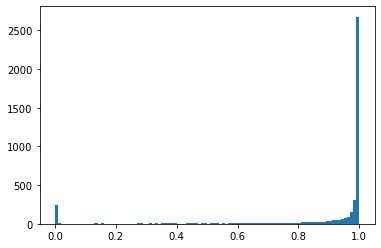

In [6]:
plt.hist(frac_good,bins=100);

For each segment, how many measurements are "good". Pretty straightforward here.

## Labeled Good > 0.9 (and not = 1.0)
This label range gets only the very good stuff. Score histograms on a per-segment basis.

In [7]:
i=0

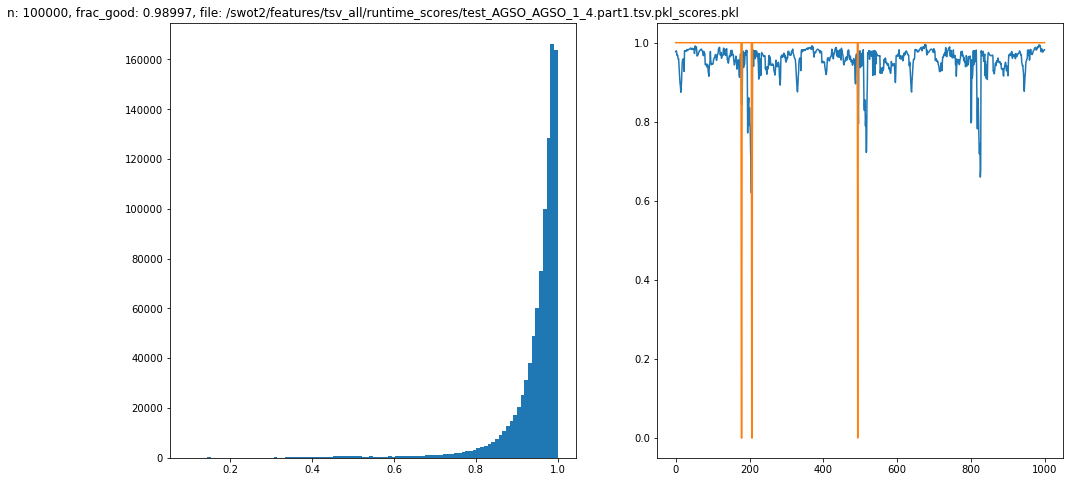

In [8]:
i+=1
while frac_good[i] < 0.9 or frac_good[i] == 1.0:
    i+=1

human,preds=read_pkl(files[i])
_mean=np.mean(preds,axis=1)
smooth_mean=savgol_filter(_mean, 51, 3)
_std=np.std(preds,axis=1)
#print(i,frac_good[i],files[i],human.shape[0])

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(preds.flatten(),bins=100);
ax[0].set_title('n: {}, frac_good: {}, file: {}'.format(str(human.shape[0]),str(frac_good[i]),files[i]))
ax[1].plot(_mean[20000:21000])
ax[1].plot(human[20000:21000])
plt.show()

## 0.1 < Labeled Good < 0.9

In [15]:
k=0

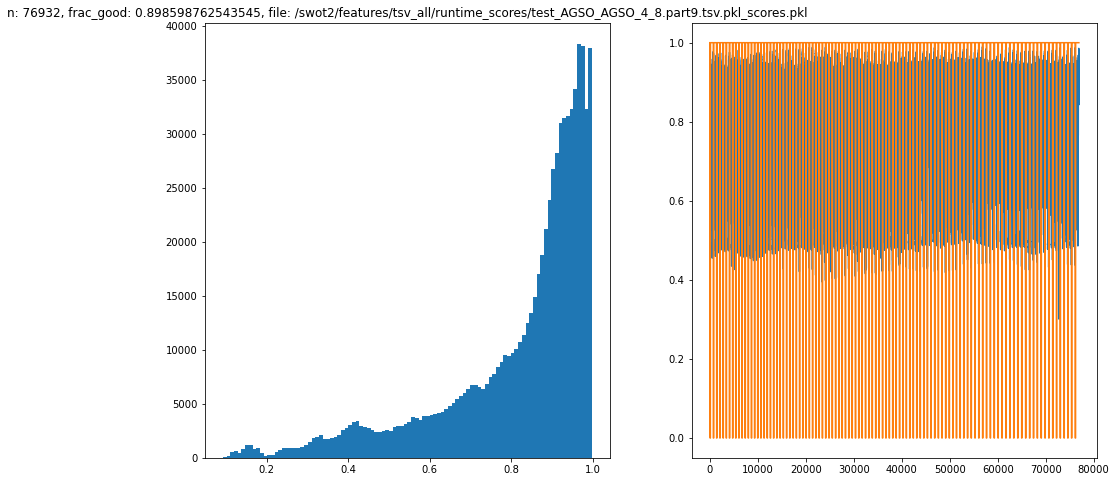

In [16]:
k+=1
while (frac_good[k] > 0.9) or (frac_good[k] < 0.1):
    k+=1

human,preds=read_pkl(files[k])
_mean=np.mean(preds,axis=1)
smooth_mean=savgol_filter(_mean, 51, 3)
_std=np.std(preds,axis=1)
#print(i,frac_good[i],files[i],human.shape[0])

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(preds.flatten(),bins=100);
ax[0].set_title('n: {}, frac_good: {}, file: {}'.format(str(human.shape[0]),str(frac_good[k]),files[k]))
ax[1].plot(_mean)
ax[1].plot(human)
plt.show()

## Labeled Good < 0.1
There are a lot of cruises with no good labels. What does that look like?

In [11]:
j=0

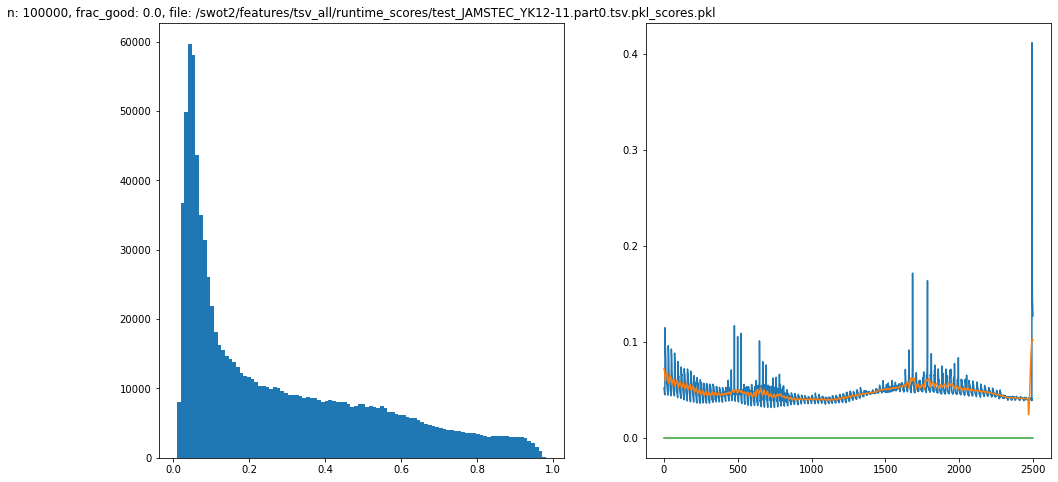

In [12]:
j+=1
while frac_good[j] > 0.1 :
    j+=1

human,preds=read_pkl(files[j])
#print(j,frac_good[j],files[j],human.shape[0])
_mean=np.mean(preds,axis=1)
smooth_mean=savgol_filter(_mean, 51, 3)
_std=np.std(preds,axis=1)

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(preds.flatten(),bins=100);
ax[0].set_title('n: {}, frac_good: {}, file: {}'.format(str(human.shape[0]),str(frac_good[j]),files[j]))
ax[1].plot(_mean[7500:10000])
ax[1].plot(smooth_mean[7500:10000])
ax[1].plot(human[7500:10000])
plt.show()

One can see the distribution is more variable here. Some cruises display something like the exponential distribution, others not so much.

## Score "time series"
These series aren't strictly along-track because the way swath data are aligned/recorded. Some periodicity in swath data might suggest certain parts of the swath are problematic (e.g., the outer bands). Other periods might correspond to wave motion.

In [24]:
from scipy.signal import savgol_filter

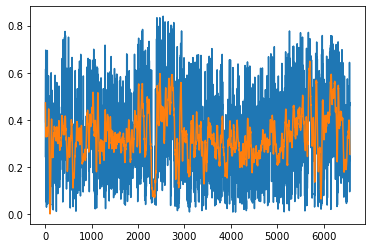

In [29]:
_mean=np.mean(preds,axis=1)
smooth_mean=savgol_filter(_mean, 51, 3)
_std=np.std(preds,axis=1)
plt.plot(_mean)
plt.plot(smooth_mean)

Band Scanning bad at the end points?

Potential for automatic cleaning?